In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/home/hannah/Downloads/DSI_kickstarterscrape_dataset.csv", engine='python',
                 parse_dates=['funded date'])

In [4]:
df = df.drop_duplicates()

In [5]:
df.groupby('status').describe()['duration'].T

status,canceled,failed,live,successful,suspended
count,59.000000,18961.000000,3916.000000,22928.000000,4.0
mean,38.943220,42.975210,37.487740,37.960297,30.0
std,13.601183,18.700137,12.683641,16.651402,0.0
min,15.000000,1.000000,7.000000,1.000000,30.0
25%,30.000000,30.000000,30.000000,30.000000,30.0
50%,30.000000,36.000000,30.000000,31.000000,30.0
75%,57.725000,59.880000,45.000000,45.000000,30.0
max,60.000000,91.960000,60.000000,91.960000,30.0


/home/hannah/miniconda3/envs/mpl/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


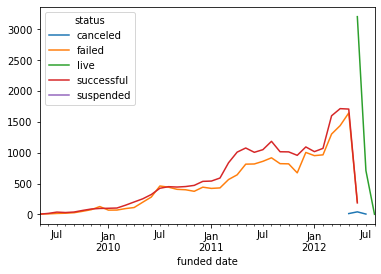

In [6]:
%matplotlib inline
df.groupby(['status', pd.Grouper(key='funded date', freq='M')]).count()['project id'].unstack().T.plot()

In [7]:
df['start date'] = df['funded date'] - pd.to_timedelta(df['duration'], unit='days')

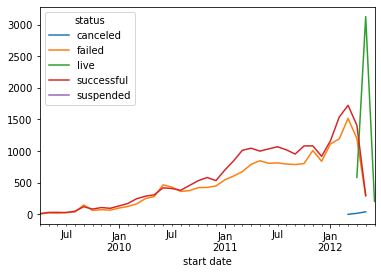

In [8]:
%matplotlib inline
df.groupby(['status', pd.Grouper(key='start date', freq='M')]).count()['project id'].unstack().T.plot()

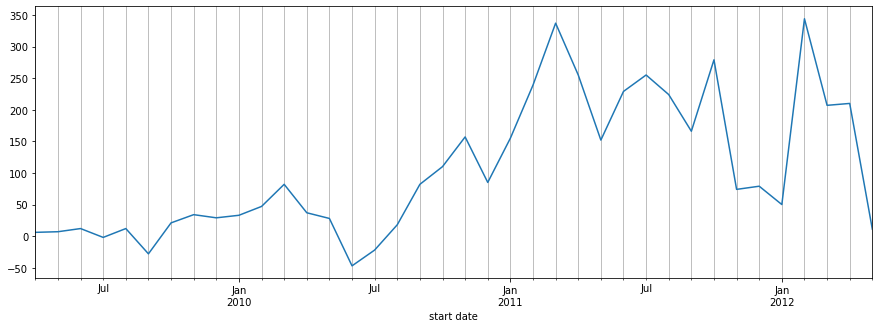

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))
(df.groupby(['status', pd.Grouper(key='start date', freq='M')]).count()['project id']['successful']-
df.groupby(['status', pd.Grouper(key='start date', freq='M')]).count()['project id']['failed']).plot(ax=ax)
ax.grid(which='both', axis='x')

In [27]:
df[['pledged','duration']].corr()

,pledged,duration
pledged,1.000000,0.001283
duration,0.001283,1.000000


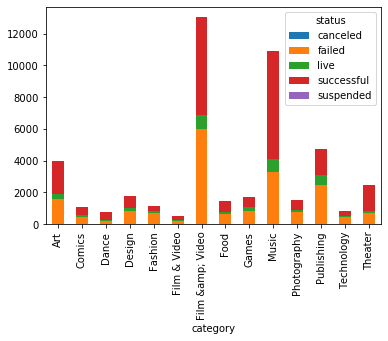

In [30]:
df.groupby(['category', 'status']).count()['project id'].unstack().plot.bar(stacked=True)

In [31]:
df.groupby(['category', 'status']).agg({'project id':'count', 'goal':'mean', 'pledged':'mean'}).unstack()

project id                                      \
status             canceled  failed   live successful suspended   
category                                                          
Art                     NaN  1582.0  301.0     2102.0       NaN   
Comics                  NaN   445.0  103.0      520.0       NaN   
Dance                   NaN   179.0   54.0      525.0       NaN   
Design                  2.0   835.0  197.0      726.0       2.0   
Fashion                 NaN   683.0  117.0      335.0       NaN   
Film & Video            1.0   210.0   41.0      246.0       NaN   
Film &amp; Video       22.0  5962.0  891.0     6177.0       1.0   
Food                    3.0   639.0  137.0      652.0       NaN   
Games                  10.0   829.0  260.0      631.0       NaN   
Music                   9.0  3256.0  847.0     6778.0       NaN   
Photography             NaN   737.0  127.0      643.0       NaN   
Publishing             10.0  2481.0  601.0     1669.0       NaN   
Technology              2.0   444.0   71.0      288.0       1.0   
Theater                 NaN   679.0  169.0     1636.0       NaN   

                           goal                                            \
status                 canceled        failed          live    successful   
category                                                                    
Art                         NaN  10668.385025   8382.023621   3587.703235   
Comics                      NaN   6987.854607   9033.058252   4097.844231   
Dance                       NaN  10848.861397   3781.500000   3016.194495   
Design             11250.000000  18447.105389  30412.568528   9021.227961   
Fashion                     NaN   8655.785286  10160.722222   4586.274627   
Film & Video       15000.000000  17900.217762  17841.195122   7001.896341   
Film &amp; Video   32405.772727  27429.447883  42873.204242   7161.912733   
Food               31650.000000  20837.811800  21276.919708   7748.787132   
Games             137000.000000  22697.667503  40333.480769  12917.901743   
Music               8033.333333   7524.951385  33107.834463   4179.193997   
Photography                 NaN   7339.822171   9443.827480   4079.384635   
Publishing         15900.000000   8470.872443  19937.743178   4249.882702   
Technology         53875.000000  22860.880698  57411.267465  11357.410139   
Theater                     NaN   9726.488542   6332.307633   3644.333680   

                                pledged                             \
status           suspended     canceled       failed          live   
category                                                             
Art                    NaN          NaN   625.128951   1322.710963   
Comics                 NaN          NaN   591.577528   3534.039216   
Dance                  NaN          NaN   656.709497   1461.648148   
Design             53500.0  1406.000000  1739.645509  14093.386598   
Fashion                NaN          NaN   584.060029   1508.230769   
Film & Video           NaN  2159.000000  1102.419048   3896.121951   
Film &amp; Video   17500.0   726.681818  1084.051661   3000.187148   
Food                   NaN   269.333333  1527.001565   2655.839416   
Games                  NaN  7227.700000  1182.283474  10262.364341   
Music                  NaN   447.666667   638.816646   1839.322314   
Photography            NaN          NaN   631.649932   1787.196850   
Publishing             NaN  2008.700000   564.222088   1192.673877   
Technology         20000.0   504.000000  1610.668919  18424.710145   
Theater                NaN          NaN   707.857143   1637.029586   

                                          
status              successful suspended  
category                                  
Art                4488.283064       NaN  
Comics             9228.271154       NaN  
Dance              3425.161905       NaN  
Design            42804.129477   14791.5  
Fashion            6917.334328       NaN  
Film & Video       8854.451220  

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45868 entries, 0 to 45956
Data columns (total 18 columns):
project id           45868 non-null int64
name                 45868 non-null object
url                  45868 non-null object
category             45868 non-null object
subcategory          45868 non-null object
location             44547 non-null object
status               45868 non-null object
goal                 45868 non-null float64
pledged              45856 non-null float64
funded percentage    45868 non-null float64
backers              45868 non-null int64
funded date          45868 non-null datetime64[ns, UTC]
levels               45868 non-null int64
reward levels        45809 non-null object
updates              45868 non-null int64
comments             45868 non-null int64
duration             45868 non-null float64
start date           45868 non-null datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64(4), int64(5), object(7)
memory usage: 6.6+ MB


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

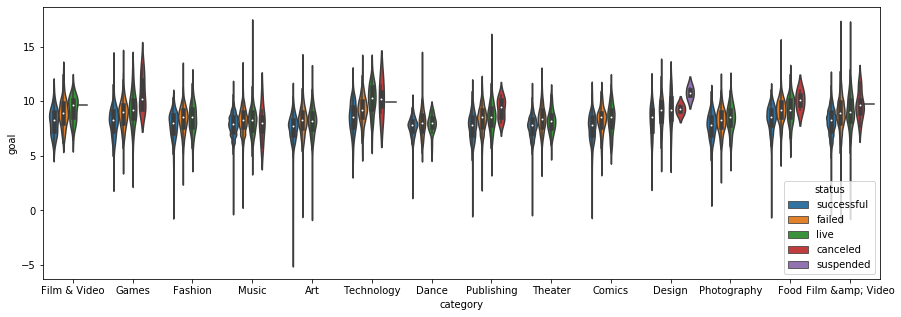

In [36]:
fig, ax=plt.subplots(figsize=(15,5))
sns.violinplot(x='category', y=np.log(df['goal']), hue='status', data = df, ax=ax)

In [37]:
df['shortfall'] = df['goal'] - df['pledged']

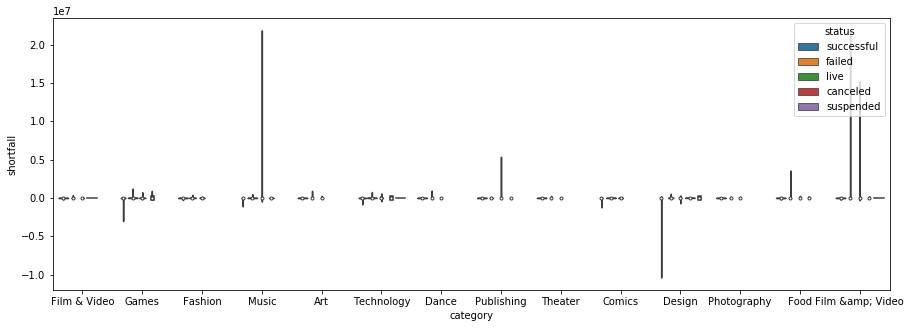

In [38]:
fig, ax=plt.subplots(figsize=(15,5))
sns.violinplot(x='category', y='shortfall', hue='status', data = df, ax=ax)

In [39]:
df.groupby('status')['goal', 'pledged','updates', 'levels', 'backers', 'comments', 'duration'] .corr()

goal   pledged   updates    levels   backers  \
status                                                                  
canceled   goal      1.000000  0.430679  0.218687  0.327858  0.515662   
           pledged   0.430679  1.000000  0.362448  0.483203  0.962828   
           updates   0.218687  0.362448  1.000000  0.382453  0.383799   
           levels    0.327858  0.483203  0.382453  1.000000  0.446386   
           backers   0.515662  0.962828  0.383799  0.446386  1.000000   
           comments  0.355222  0.927294  0.343692  0.384880  0.950745   
           duration  0.020850 -0.166169 -0.135375 -0.226059 -0.176030   
failed     goal      1.000000  0.072725  0.007986  0.017465  0.042458   
           pledged   0.072725  1.000000  0.333643  0.210965  0.759214   
           updates   0.007986  0.333643  1.000000  0.230910  0.407428   
           levels    0.017465  0.210965  0.230910  1.000000  0.237255   
           backers   0.042458  0.759214  0.407428  0.237255  1.000000   
           comments  0.029368  0.478674  0.204666  0.100894  0.620767   
           duration  0.035212  0.018865  0.063633  0.026974  0.005095   
live       goal      1.000000  0.028438  0.006417  0.016034  0.018773   
           pledged   0.028438  1.000000  0.269120  0.140177  0.789193   
           updates   0.006417  0.269120  1.000000  0.316619  0.326523   
           levels    0.016034  0.140177  0.316619  1.000000  0.167960   
           backers   0.018773  0.789193  0.326523  0.167960  1.000000   
           comments  0.027697  0.534942  0.263320  0.136690  0.604065   
           duration  0.010292  0.007430  0.055230  0.011808 -0.002815   
successful goal      1.000000  0.419030  0.205598  0.234249  0.602066   
           pledged   0.419030  1.000000  0.078404  0.072780  0.829769   
           updates   0.205598  0.078404  1.000000  0.233479  0.088963   
           levels    0.234249  0.072780  0.233479  1.000000  0.077345   
           backers   0.602066  0.829769  0.088963  0.077345  1.000000   
           comments  0.553280  0.557234  0.097570  0.099994  0.705477   
           duration  0.074668  0.013775  0.159206  0.077010  0.004692   
suspended  goal      1.000000 -0.415261 -0.124111  0.967331 -0.421693   
           pledged  -0.415261  1.000000  0.591227 -0.249030  0.711325   
           updates  -0.124111  0.591227  1.000000 -0.171634 -0.146006   
           levels    0.967331 -0.249030 -0.171634  1.000000 -0.178073   
           backers  -0.421693  0.711325 -0.146006 -0.178073  1.000000   
           comments -0.420386  0.805832 -0.001128 -0.179117  0.989089   
           duration       NaN       NaN       NaN       NaN       NaN   

                     comments  duration  
status                                   
canceled   goal      0.355222  0.020850  
           pledged   0.927294 -0.166169  
           updates   0.343692 -0.135375  
           levels    0.384880 -0.226059  
           backers   0.950745 -0.176030  
           comments  1.000000 -0.111264  
           duration -0.111264  1.000000  
failed     goal      0.029368  0.035212  
           pledged   0.478674  0.018865  
           updates   0.204666  0.063633  
           levels    0.100894  0.026974  
           backers   0.620767  0.005095  
           comments  1.000000  0.013244  
           duration  0.013244  1.000000  
live       goal      0.027697  0.010292  
           pledged   0.534942  0.007430  
           updates   0.263320  0.055230  
           levels    0.136690  0.011808  
           backers   0.604065 -0.002815  
           comments  1.000000 -0.008564  
           duration -0.008564  1.000000  
successful goal      0.553280  0.074668  
           pledged   0.557234  0.013775  
           updates   0.097570  0.159206  
           levels    0.099994  0.077010  
           backers   0.705477  0.004692  
           comments  1.000000 -0.001780  
           duration -0.001780  1.000000  
suspended  goal     -0.420386       NaN  
           pledged   

In [40]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
dfc = df.dropna()

In [45]:
X = dfc[['goal', 'pledged','updates', 'levels', 'backers', 'comments', 'duration']]

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
le = LabelEncoder()
le.fit(dfc['status'])
y = le.transform(dfc['status'])

In [57]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [58]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [59]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [-1.15343830e-07 -1.28070495e-06  5.73109967e-02  8.73551731e-03
  2.65090083e-04 -3.18173043e-04 -8.72327199e-03]
Mean squared error: 0.77
Variance score: 0.15


<BarContainer object of 7 artists>

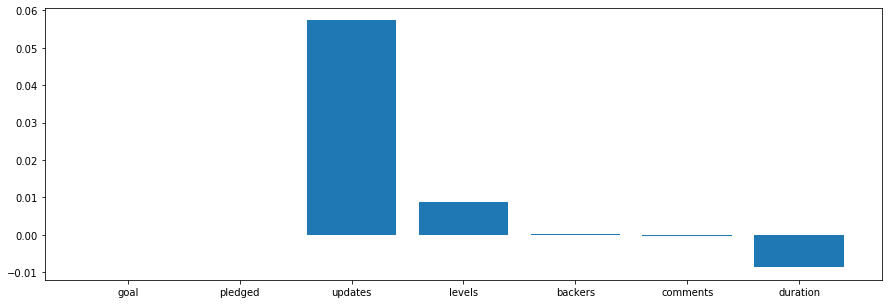

In [61]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(['goal', 'pledged','updates', 'levels', 'backers', 'comments', 'duration'], 
       regr.coef_)